# 03 Q-agent hyperparameters analysis

#### 👉RL agents are extremely sensitive to hyper-parameters.

#### 👉In the previous notebook you trusted me when I set them, but in reality you will need to tune them yourself.

#### 👉Let's play with them in a systematic way to gain a better intuition of how they impact learning.

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [7]:
import gym
env = gym.make("Taxi-v3", render_mode = 'ansi')

## Q-agent 🤖🧠

In [4]:
# No need to copy paste the same QAgent
# definition in every notebook, don't you think?
from q_agent import QAgent

# hyper-parameters
# RL problems are full of these hyper-parameters.
# For the moment, trust me when I set these values.
# We will later play with these and see how they impact learning.
alphas = [0.01, 0.1, 1]
gammas = [0.1, 0.6, 0.9]

## Training loop 🎡

In [10]:
import pandas as pd

from loops import train

# exploration vs exploitation prob
# let's start with a constant probability of 10%.
epsilon = 0.1
n_episodes = 1000

results = pd.DataFrame()
for alpha in alphas:
    for gamma in gammas:
        
        print(f'alpha: {alpha}, gamma: {gamma}')
        agent = QAgent(env, alpha, gamma)
        
        _, timesteps, penalties = train(agent,
                                        env,
                                        n_episodes,
                                        epsilon)
        
        # collect timesteps and penalties for this pair
        # of hyper-parameters (alpha, gamma)
        results_ = pd.DataFrame()
        results_['timesteps'] = timesteps
        results_['penalties'] = penalties
        results_['alpha'] = alpha
        results_['gamma'] = gamma
        results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(
    columns={'index': 'episode'})

# add column with the 2 hyper-parameters
results['hyperparameters'] = [
    f'alpha={a}, gamma={g}'
    for (a, g) in zip(results['alpha'], results['gamma'])
]

alpha: 0.01, gamma: 0.1


100%|██████████| 1000/1000 [00:05<00:00, 177.55it/s]


alpha: 0.01, gamma: 0.6


100%|██████████| 1000/1000 [00:05<00:00, 185.93it/s]


alpha: 0.01, gamma: 0.9


100%|██████████| 1000/1000 [00:05<00:00, 186.60it/s]


alpha: 0.1, gamma: 0.1


100%|██████████| 1000/1000 [00:05<00:00, 192.39it/s]


alpha: 0.1, gamma: 0.6


100%|██████████| 1000/1000 [00:03<00:00, 303.54it/s]


alpha: 0.1, gamma: 0.9


100%|██████████| 1000/1000 [00:02<00:00, 381.07it/s]


alpha: 1, gamma: 0.1


100%|██████████| 1000/1000 [00:00<00:00, 1052.85it/s]


alpha: 1, gamma: 0.6


100%|██████████| 1000/1000 [00:00<00:00, 1039.29it/s]


alpha: 1, gamma: 0.9


100%|██████████| 1000/1000 [00:00<00:00, 1085.31it/s]


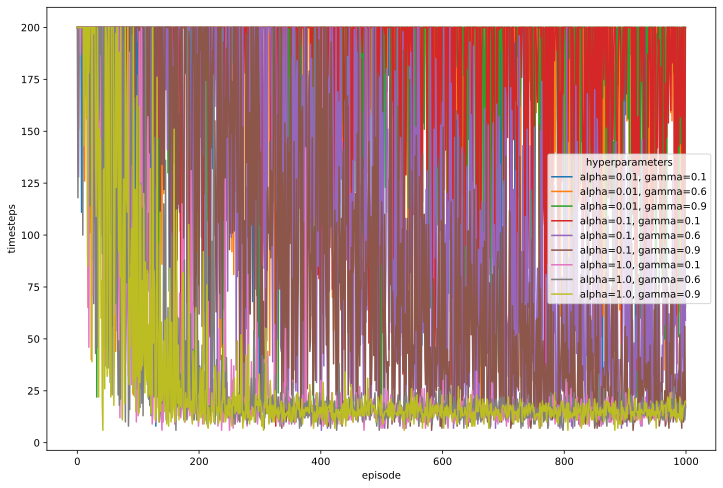

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'episode', 'timesteps' e 'hyperparameters' são colunas em seu DataFrame 'results'
fig = plt.gcf()
fig.set_size_inches(12, 8)

sns.lineplot(x='episode', y='timesteps', hue='hyperparameters', data=results)

plt.show()


## That looks cool! 😎 But a bit too noisy... 😵‍💫
## What about averaging over several runs?

In [14]:
from loops import train_many_runs

alphas = [0.1, 1]
gammas = [0.1, 0.6, 0.9]

epsilon = 0.1
n_episodes = 1000
n_runs = 10

results = pd.DataFrame()
for alpha in alphas:
    for gamma in gammas:
        
        print(f'alpha: {alpha}, gamma: {gamma}')
        agent = QAgent(env, alpha, gamma)
        
        timesteps, penalties = train_many_runs(agent,
                                               env,
                                               n_episodes,
                                               epsilon,
                                               n_runs)
        
        # collect timesteps and penalties for this pair of
        # hyper-parameters (alpha, gamma)
        results_ = pd.DataFrame()
        results_['timesteps'] = timesteps
        results_['penalties'] = penalties
        results_['alpha'] = alpha
        results_['gamma'] = gamma
        results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(
    columns={'index': 'episode'})

results['hyperparameters'] = [
    f'alpha={a}, gamma={g}'
    for (a, g) in zip(results['alpha'], results['gamma'])]

alpha: 0.1, gamma: 0.1


100%|██████████| 1000/1000 [00:05<00:00, 192.03it/s]


alpha: 0.1, gamma: 0.6


100%|██████████| 1000/1000 [00:03<00:00, 297.55it/s]


alpha: 0.1, gamma: 0.9


100%|██████████| 1000/1000 [00:02<00:00, 372.54it/s]


alpha: 1, gamma: 0.1


100%|██████████| 1000/1000 [00:01<00:00, 984.06it/s]


alpha: 1, gamma: 0.6


100%|██████████| 1000/1000 [00:01<00:00, 982.85it/s]


alpha: 1, gamma: 0.9


100%|██████████| 1000/1000 [00:01<00:00, 995.09it/s]


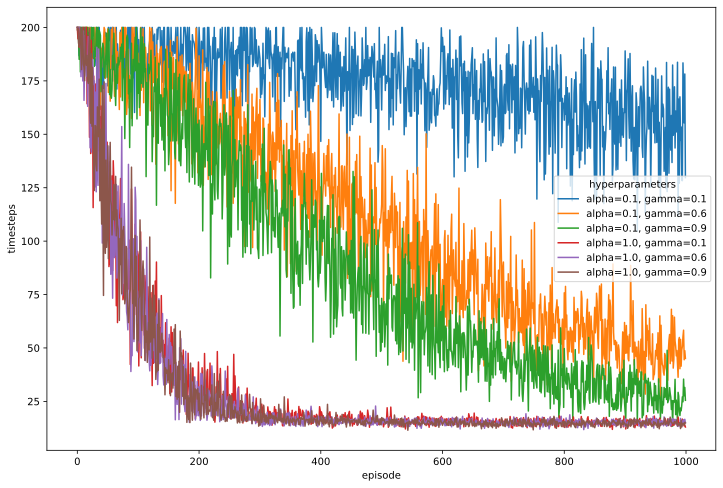

In [18]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

sns.lineplot(x='episode', y='timesteps', hue='hyperparameters', data=results)

plt.show()

## Nice one!

## What about `epsilon`? Is the current value of 10% the best?

In [19]:
# best hyper-parameters so far
alpha = 1.0
gamma = 0.9

epsilons = [0.01, 0.10, 0.9]
n_runs = 10
n_episodes = 200

results = pd.DataFrame()
for epsilon in epsilons:
        
    print(f'epsilon: {epsilon}')
    agent = QAgent(env, alpha, gamma)

    timesteps, penalties = train_many_runs(agent,
                                           env,
                                           n_episodes,
                                           epsilon,
                                           n_runs)

    # collect timesteps and penalties for this pair of
    # hyper-parameters (alpha, gamma)
    results_ = pd.DataFrame()
    results_['timesteps'] = timesteps
    results_['penalties'] = penalties
    results_['epsilon'] = epsilon
    results = pd.concat([results, results_])

# index -> episode
results = results.reset_index().rename(columns={'index': 'episode'})

epsilon: 0.01


100%|██████████| 200/200 [00:00<00:00, 414.22it/s]


epsilon: 0.1


100%|██████████| 200/200 [00:00<00:00, 381.38it/s]


epsilon: 0.9


100%|██████████| 200/200 [00:01<00:00, 164.87it/s]


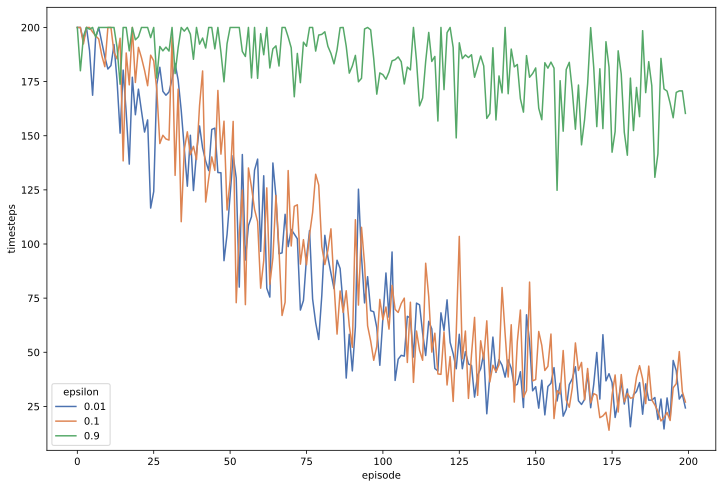

<Axes: xlabel='episode', ylabel='penalties'>

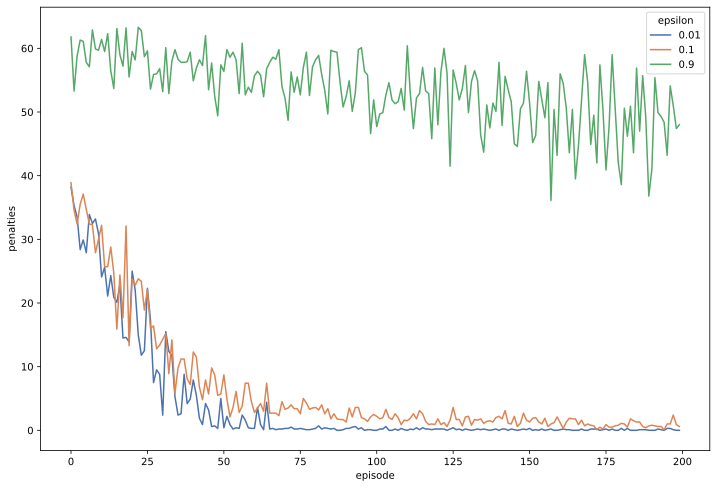

In [28]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

sns.lineplot(x='episode', y='timesteps', hue='epsilon', data=results, palette='deep')

plt.show()

fig = plt.gcf()
fig.set_size_inches(12, 8)

sns.lineplot(x='episode', y='penalties', hue='epsilon', data=results, palette='deep')